In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0], inplace=True)

/tmp/ipython-input-1458630587.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0], inplace=True)
/tmp/ipython-input-1458630587.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [6]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [7]:
age_map = {
    '0-17': 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+': 6
}

In [8]:
df['Age'] = df['Age'].map(age_map)

In [9]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4').astype(int)


In [10]:
df.to_csv('cleaned_data.csv', index=False)

In [11]:
data=pd.read_csv('cleaned_data.csv')

In [12]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,6,16,C,4,0,8,8.0,16.0,7969


In [13]:
data.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [14]:
avg_purchase = df.groupby(["Gender", "Age"])["Purchase"].mean().reset_index()
avg_purchase

,Gender,Age,Purchase
0,0,0,8338.771985
1,0,1,8343.180201
2,0,2,8728.251754
3,0,3,8959.844056
4,0,4,8842.098947
5,0,5,9042.449666
6,0,6,9007.036199
7,1,0,9235.173670
8,1,1,9440.942971
9,1,2,9410.337578


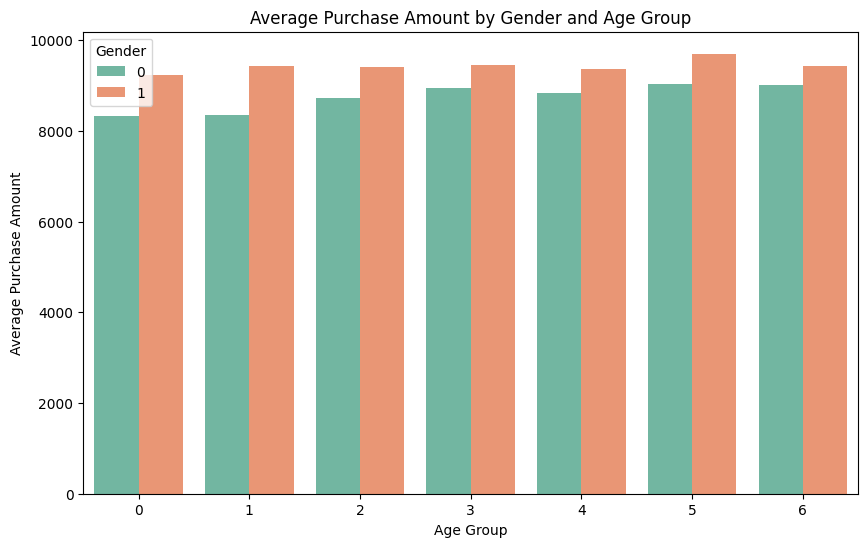

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(data=avg_purchase, x="Age", y="Purchase", hue="Gender", palette="Set2")

plt.title("Average Purchase Amount by Gender and Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")
plt.legend(title="Gender")
plt.show()

Text(0, 0.5, 'Purchase Amount')

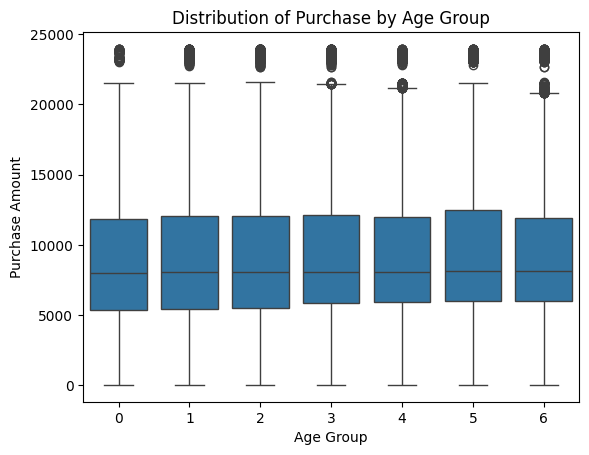

In [16]:
sns.boxplot(data=df, x="Age", y="Purchase")
plt.title("Distribution of Purchase by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")

In [17]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,6,16,C,4,0,8,8.0,16.0,7969


In [18]:
total_purschase=df.groupby(['City_Category'])["Purchase"].sum()
total_purschase

,Purchase
City_Category,
A,1316471661
B,2115533605
C,1663807476


Text(0, 0.5, 'Total Purchase Amount')

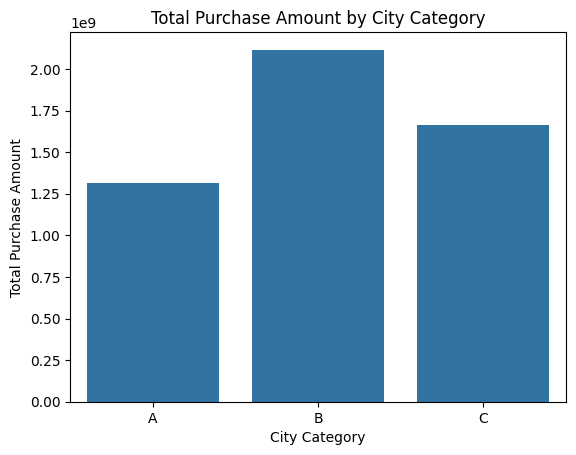

In [19]:
sns.barplot(x=total_purschase.index, y=total_purschase.values)
plt.title("Total Purchase Amount by City Category")
plt.xlabel("City Category")
plt.ylabel("Total Purchase Amount")

In [20]:
avg_age_grp=df.groupby(['Age','Gender'])['Purchase'].mean().reset_index().sort_values(by='Purchase', ascending=False)
avg_age_grp

,Age,Gender,Purchase
11,5,1,9705.094802
7,3,1,9453.193643
3,1,1,9440.942971
13,6,1,9438.195603
5,2,1,9410.337578
9,4,1,9357.471509
1,0,1,9235.173670
10,5,0,9042.449666
12,6,0,9007.036199
6,3,0,8959.844056


Text(0, 0.5, 'Average Purchase Amount')

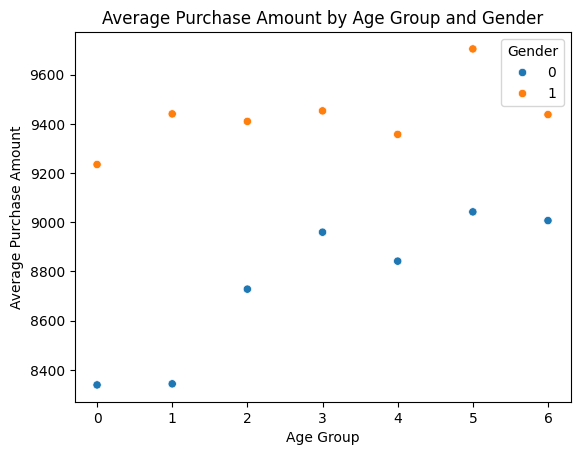

In [21]:
sns.scatterplot(x='Age',y='Purchase',data=avg_age_grp,hue='Gender')
plt.title("Average Purchase Amount by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")

In [22]:
avg_purchase=df.groupby(['Marital_Status'])['Purchase'].mean()
avg_purchase

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


Text(0, 0.5, 'Average Purchase Amount')

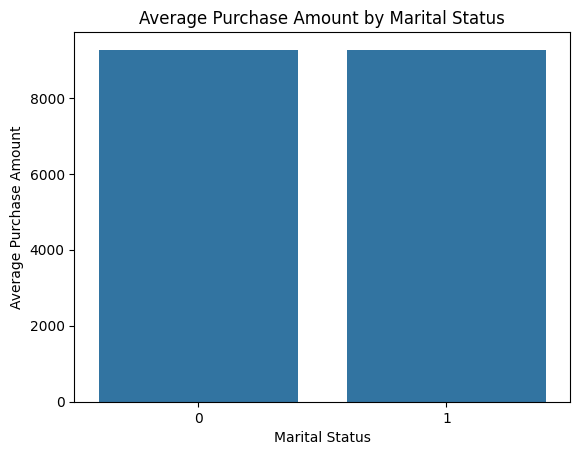

In [23]:
sns.barplot(x=avg_purchase.index, y=avg_purchase.values)
plt.title("Average Purchase Amount by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Average Purchase Amount")

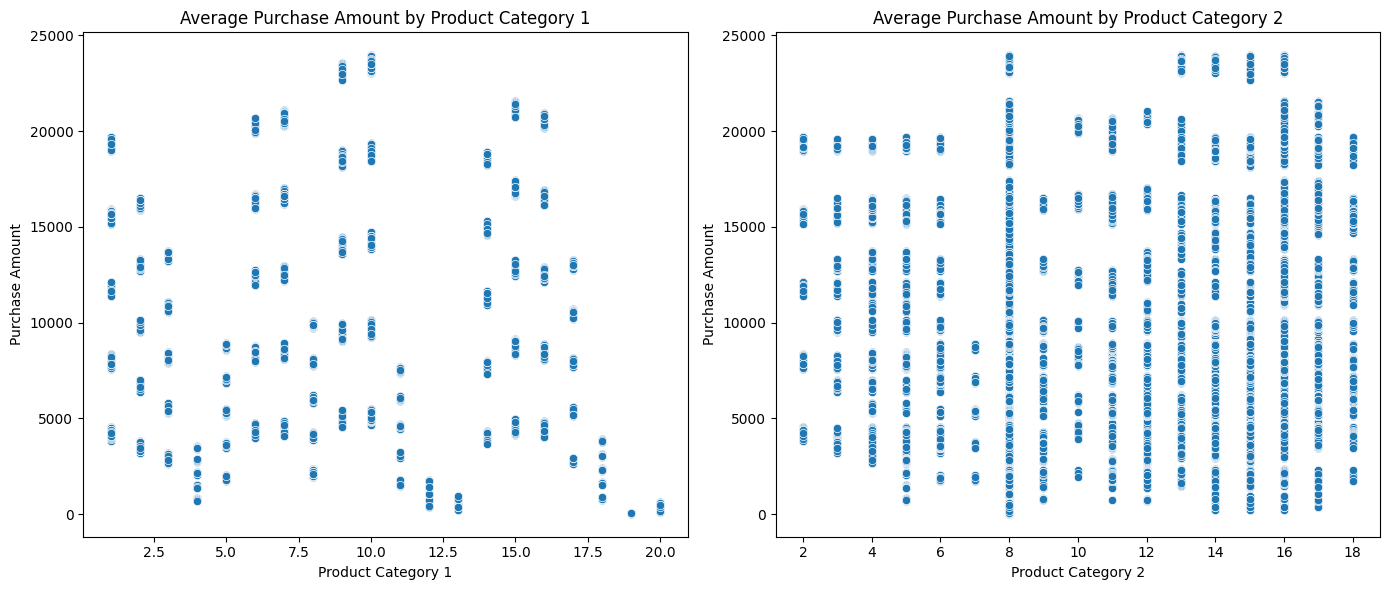

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 1 row, 2 columns

# Scatter plot for Product Category 1
sns.scatterplot(ax=axes[0], x='Product_Category_1', y='Purchase', data=df)
axes[0].set_title("Average Purchase Amount by Product Category 1")
axes[0].set_xlabel("Product Category 1")
axes[0].set_ylabel("Purchase Amount")

# Scatter plot for Product Category 2
sns.scatterplot(ax=axes[1], x='Product_Category_2', y='Purchase', data=df)
axes[1].set_title("Average Purchase Amount by Product Category 2")
axes[1].set_xlabel("Product Category 2")
axes[1].set_ylabel("Purchase Amount")

plt.tight_layout()
plt.show()

In [25]:
top_5=df.groupby(['Product_ID'])['Purchase'].sum().sort_values(ascending=False).head(5)
top_5

,Purchase
Product_ID,
P00025442,27995166
P00110742,26722309
P00255842,25168963
P00059442,24338343
P00184942,24334887


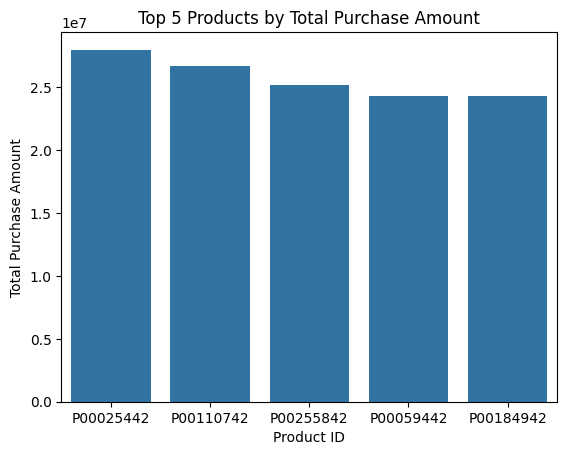

In [26]:
plot = sns.barplot(x=top_5.index, y=top_5.values)

# Define tick positions
ticks = [0, 5000000, 10000000, 15000000, 20000000, 25000000]
plt.yticks(ticks)   # apply custom ticks

plt.title("Top 5 Products by Total Purchase Amount")
plt.xlabel("Product ID")
plt.ylabel("Total Purchase Amount")
plt.show()

In [27]:
avg_purchase=df.groupby(['Age'])['Purchase'].mean().sort_values(ascending=False)
avg_purchase

,Purchase
Age,
5,9534.808031
6,9336.280459
3,9331.350695
2,9252.690633
4,9208.625697
1,9169.663606
0,8933.464640


Text(0, 0.5, 'Average Purchase Amount')

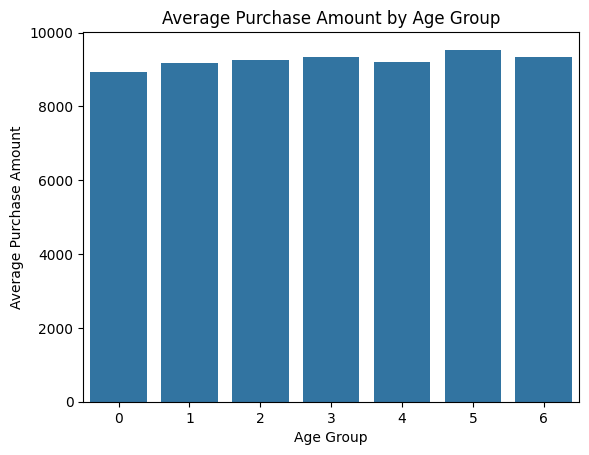

In [28]:
sns.barplot(x=avg_purchase.index, y=avg_purchase.values)
plt.title("Average Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount")

In [29]:
top_5_purchase=df.groupby(['Occupation'])['Purchase'].sum().sort_values(ascending=False).head(5)
top_5_purchase

,Purchase
Occupation,
4,666244484
0,635406958
7,557371587
1,424614144
17,393281453


Text(0, 0.5, 'Total Purchase Amount')

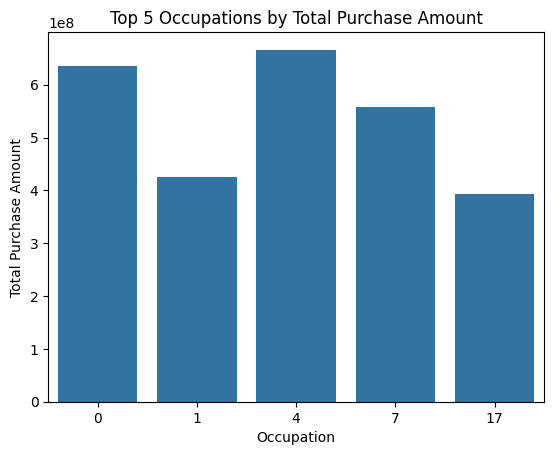

In [30]:
sns.barplot(x=top_5_purchase.index, y=top_5_purchase.values)
plt.title("Top 5 Occupations by Total Purchase Amount")
plt.xlabel("Occupation")
plt.ylabel("Total Purchase Amount")

In [31]:
purchase_current_city=df.groupby(['Stay_In_Current_City_Years'])['Purchase'].sum().sort_values(ascending=False).head(5)
purchase_current_city

,Purchase
Stay_In_Current_City_Years,
1,1792872533
2,949173931
3,884902659
4,785884390
0,682979229


Text(0, 0.5, 'Total Purchase Amount')

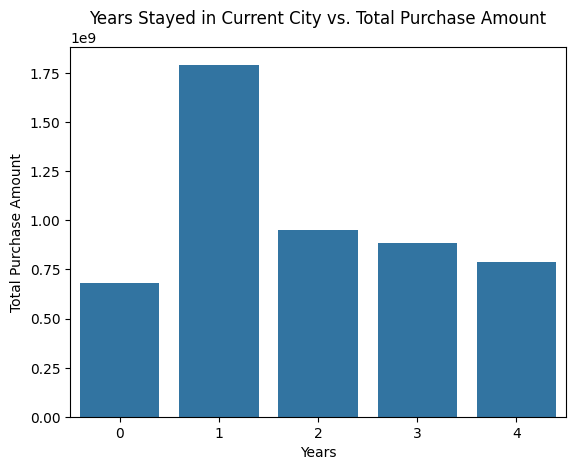

In [32]:
sns.barplot(x=purchase_current_city.index, y=purchase_current_city.values)
plt.title("Years Stayed in Current City vs. Total Purchase Amount")
plt.xlabel("Years")
plt.ylabel("Total Purchase Amount")

In [33]:
purchase_current_city_avg=df.groupby(['Stay_In_Current_City_Years'])['Purchase'].mean().sort_values(ascending=False).head(5)
purchase_current_city_avg

,Purchase
Stay_In_Current_City_Years,
2,9320.429810
3,9286.904119
4,9275.598872
1,9250.145923
0,9180.075123


Text(0, 0.5, 'Total Purchase Amount')

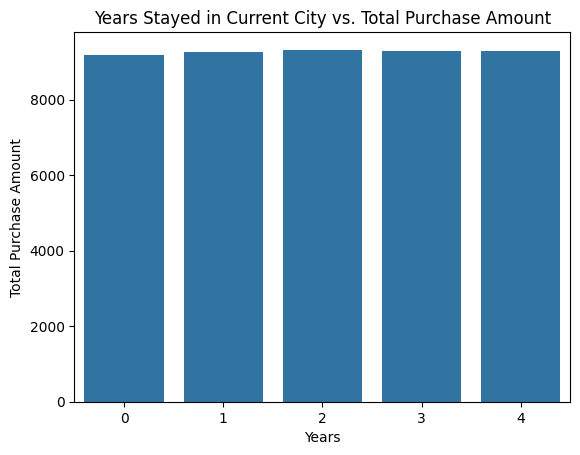

In [34]:
sns.barplot(x=purchase_current_city_avg.index, y=purchase_current_city_avg.values)
plt.title("Years Stayed in Current City vs. Total Purchase Amount")
plt.xlabel("Years")
plt.ylabel("Total Purchase Amount")

In [35]:
max_purchase_1=df.groupby(['Product_Category_1'])['Purchase'].max().sort_values(ascending=False).head(5)
max_purchase_1

,Purchase
Product_Category_1,
10,23961
9,23531
15,21569
7,21080
16,20971


In [36]:
max_purchase_2=df.groupby(['Product_Category_2'])['Purchase'].max().sort_values(ascending=False).head(5)
max_purchase_2

,Purchase
Product_Category_2,
15.0,23961
16.0,23960
13.0,23960
8.0,23959
14.0,23939


In [37]:
max_purchase_3=df.groupby(['Product_Category_3'])['Purchase'].max().sort_values(ascending=False).head(5)
max_purchase_3

,Purchase
Product_Category_3,
16.0,23961
17.0,21525
13.0,20690
14.0,20689
15.0,20686


/tmp/ipython-input-120212608.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max_purchase_1.index, y=max_purchase_1.values, ax=axes[0], palette="Blues_r")
/tmp/ipython-input-120212608.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max_purchase_2.index, y=max_purchase_2.values, ax=axes[1], palette="Greens_r")
/tmp/ipython-input-120212608.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max_purchase_3.index, y=max_purchase_3.values, ax=axes[2], palette="Oranges_r")


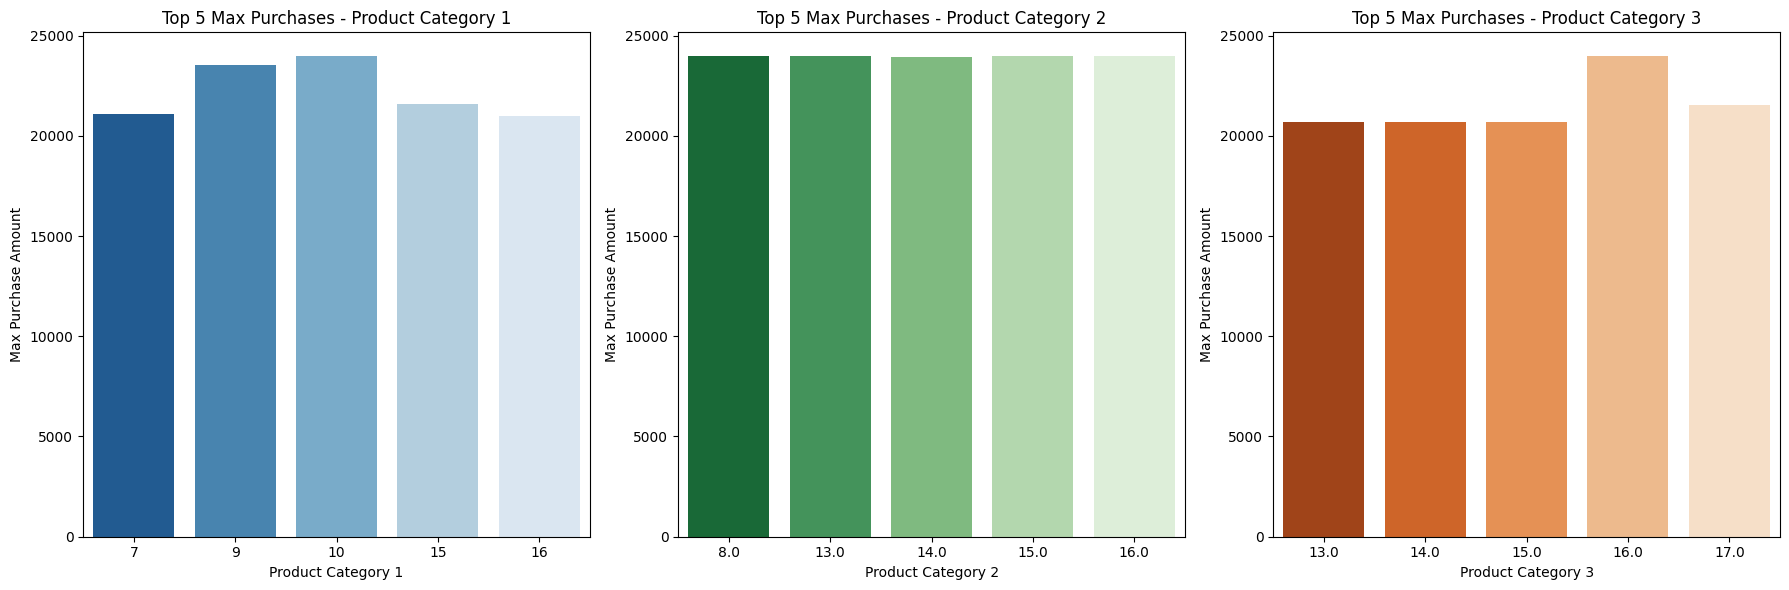

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

# Product Category 1
sns.barplot(x=max_purchase_1.index, y=max_purchase_1.values, ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 5 Max Purchases - Product Category 1")
axes[0].set_xlabel("Product Category 1")
axes[0].set_ylabel("Max Purchase Amount")

# Product Category 2
sns.barplot(x=max_purchase_2.index, y=max_purchase_2.values, ax=axes[1], palette="Greens_r")
axes[1].set_title("Top 5 Max Purchases - Product Category 2")
axes[1].set_xlabel("Product Category 2")
axes[1].set_ylabel("Max Purchase Amount")

# Product Category 3
sns.barplot(x=max_purchase_3.index, y=max_purchase_3.values, ax=axes[2], palette="Oranges_r")
axes[2].set_title("Top 5 Max Purchases - Product Category 3")
axes[2].set_xlabel("Product Category 3")
axes[2].set_ylabel("Max Purchase Amount")

plt.tight_layout()
plt.show()

In [39]:
unique_products=df.groupby(['User_ID'])['Product_ID'].nunique()
unique_products

,Product_ID
User_ID,
1000001,35
1000002,77
1000003,29
1000004,14
1000005,106
...,...
1006036,514
1006037,122
1006038,12


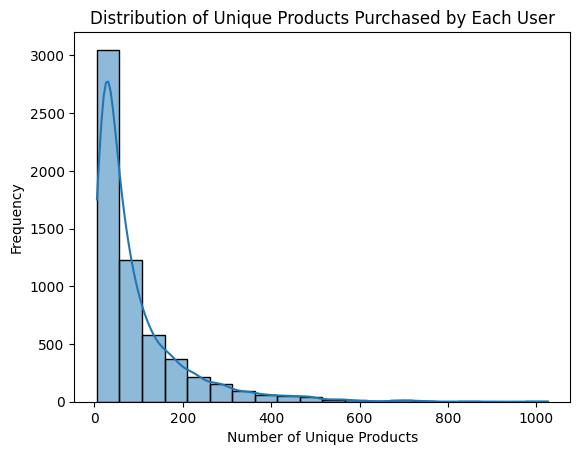

In [40]:
sns.histplot(unique_products, bins=20, kde=True)
plt.title("Distribution of Unique Products Purchased by Each User")
plt.xlabel("Number of Unique Products")
plt.ylabel("Frequency")
plt.show()

In [41]:
correlation=df[['User_ID','Gender','Age','Occupation','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].corr()
correlation

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,-0.030737,0.020443,0.003825,0.002065,-0.000186,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,0.014660,-0.011603,-0.045594,-0.012445,-0.006003,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,-0.004712,0.311738,0.061197,0.041075,0.037073,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,0.030005,0.024280,-0.007618,0.001566,0.000246,0.020833
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,1.000000,-0.012819,-0.004213,-0.000748,0.000016,0.005422
Marital_Status,0.020443,-0.011603,0.311738,0.024280,-0.012819,1.000000,0.019888,0.010260,0.013978,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.004213,0.019888,1.000000,0.279247,0.317944,-0.343703
Product_Category_2,0.002065,-0.012445,0.041075,0.001566,-0.000748,0.010260,0.279247,1.000000,0.463188,-0.128651
Product_Category_3,-0.000186,-0.006003,0.037073,0.000246,0.000016,0.013978,0.317944,0.463188,1.000000,-0.185945
Purchase,0.004716,0.060346,0.015839,0.020833,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000


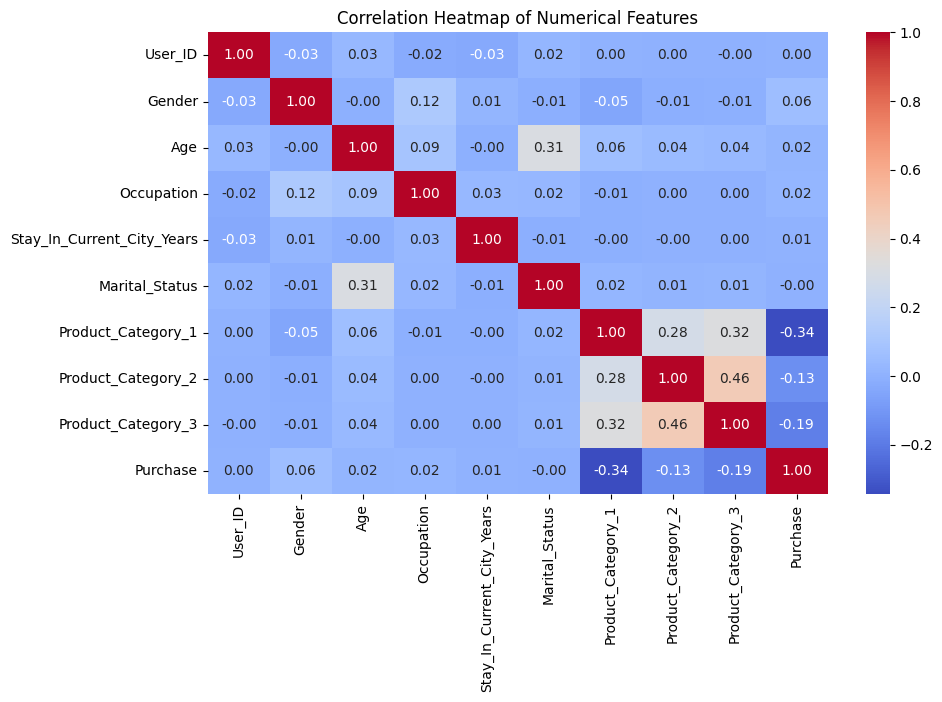

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [43]:
purchase_corr = correlation["Purchase"].sort_values(ascending=False)
print("Correlation of features with Purchase:\n", purchase_corr)

Correlation of features with Purchase:
 Purchase                      1.000000
Gender                        0.060346
Occupation                    0.020833
Age                           0.015839
Stay_In_Current_City_Years    0.005422
User_ID                       0.004716
Marital_Status               -0.000463
Product_Category_2           -0.128651
Product_Category_3           -0.185945
Product_Category_1           -0.343703
Name: Purchase, dtype: float64
